#Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics


#Importing dataset and preprocessing

In [3]:
house_price_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/BostonHousing.csv')
# house_price_dataframe = house_price_dataset.data,columns


In [4]:
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

Getting statistics

In [6]:
house_price_dataset.shape

(506, 14)

In [7]:
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features

In [8]:
correlation = house_price_dataset.corr()

<Axes: >

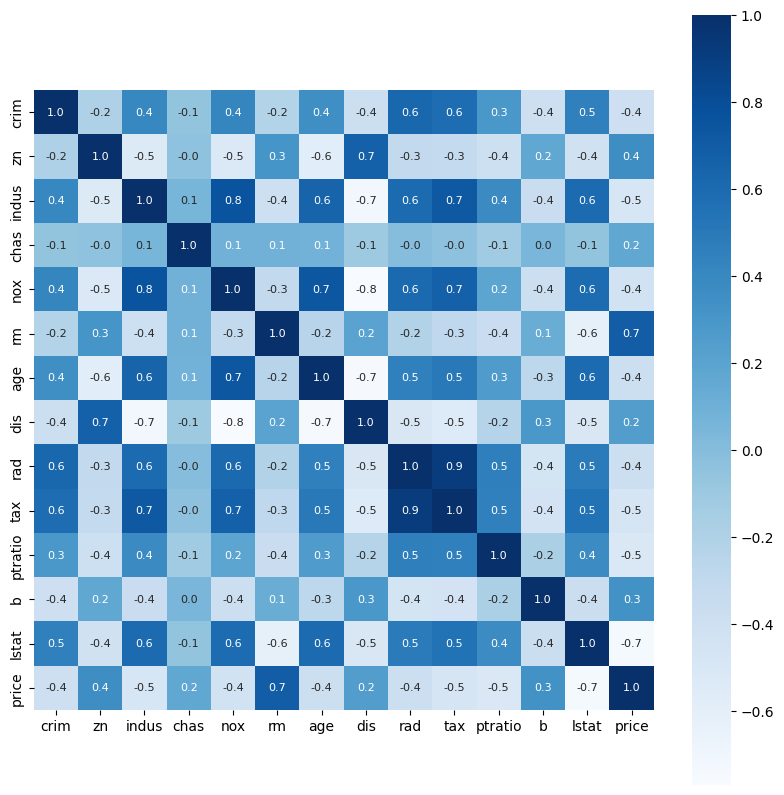

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt = '.1f',annot=True,annot_kws = {'size':8},cmap = 'Blues')

Splitting data


In [10]:
X = house_price_dataset.iloc[:,:-1]
Y = house_price_dataset.iloc[:,-1]

Scaling


In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-0.41978194  0.28482986 -1.2879095  ... -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.30309415  0.39642699
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ...  1.17646583  0.4032249
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ...  1.17646583  0.44105193
  -0.66905833]]


Splitting data into train and test

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training (XGBoost Regressor)

In [17]:
model = XGBRegressor()

In [18]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [21]:
prediction_training_data = model.predict(X_train)
print(prediction_training_data)

[36.408726  13.30289   24.81106   20.421053  44.0035    28.99005
 39.80721   22.90261   22.998762  15.307088  23.698605  30.486794
 33.198135  26.397915  49.99276   14.271653   8.09399   16.00868
 19.999699   8.520493  23.732824  26.390816  18.497559  19.955462
 50.00692   13.40168   13.126099  12.693163  49.972313  15.632486
 49.99423   29.412073  42.80147   21.706987  11.775173  24.785557
 19.38393   17.520918  13.4481535 13.924884  24.432196  14.9859295
 13.787217  23.079695  12.567207  14.897492  21.899303  18.462366
 30.785059  14.653114  23.881569  18.202784  21.708807  13.478152
 50.001286  23.110973  48.792725  13.806482  20.101936  49.99561
 34.958797   8.401559  15.188825  22.951288  24.706491  25.257534
 17.205238  49.98806   22.878754  20.19766   17.418028  19.495514
 18.509993  14.004326  22.605463  14.113604  15.617925  46.00545
 20.5101    13.517952  10.431139  21.404861  21.587019  23.18341
 23.033842  17.611063  16.10238    5.0013537  8.301531  27.492723
 18.67415   21

In [30]:
#R squared score
score_1 = metrics.r2_score(Y_train,prediction_training_data)
print("R squared score = " ,score_1)
#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train,prediction_training_data)
print("Mean absolute error = ",score_2)


R squared score =  0.9999911407789398
Mean absolute error =  0.01893801547513154


Visualizing

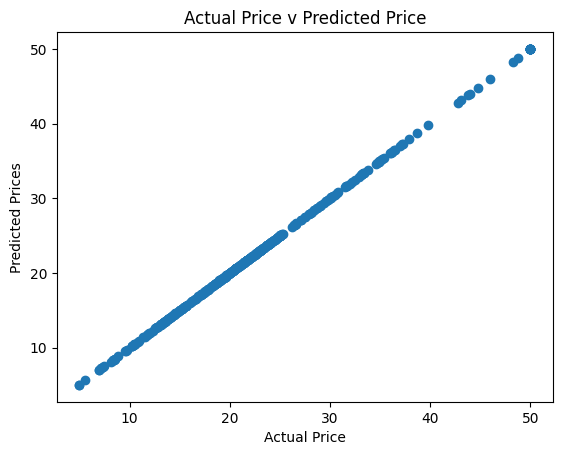

In [34]:
plt.scatter(Y_train,prediction_training_data)
plt.xlabel ("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v Predicted Price")
plt.show()

For testing data

In [32]:
prediction_testing_data = model.predict(X_test)
print(prediction_testing_data)

[16.939705  22.48864   19.438002  17.503428  48.611794  24.344488
 35.347     18.085268  16.341955  15.874559  31.570824  23.251278
 21.054943  23.687674  21.004591  12.063484  19.912336  10.32723
 12.76593   15.050334   5.308329  15.116011  20.078228  20.204744
 19.394217  20.071047  16.515762  16.289587  20.339949  18.996737
 12.091673  22.253323  32.315464  23.070326  15.364143  11.611989
 32.524666  42.484306  22.82761   22.726498  44.352715  31.539963
 12.913236  28.2516    29.083057  20.403786  49.575294  20.824497
 21.017864  21.859861  30.96465   22.164236  10.604513  28.211567
 14.920446  20.048523  24.659391  32.11944   19.636942  30.537674
 17.47852   18.764103  29.4898    19.724762  43.014294  28.018154
 30.221169   7.5133653 18.34576   22.13426   23.431469  21.443922
 23.780285  26.959208  15.407722  32.419365  14.843024  25.105324
 15.306761  21.512606  18.777119  17.11387   27.689423  20.195147
 25.639833  20.311584  30.026844  19.85136   21.260056  48.92131
 27.815813  

In [33]:
#R squared score
score_1 = metrics.r2_score(Y_test,prediction_testing_data)
print("R squared score = " ,score_1)
#Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test,prediction_testing_data)
print("Mean absolute error = ",score_2)


R squared score =  0.8303203912970959
Mean absolute error =  2.419945604660932


Visualizing

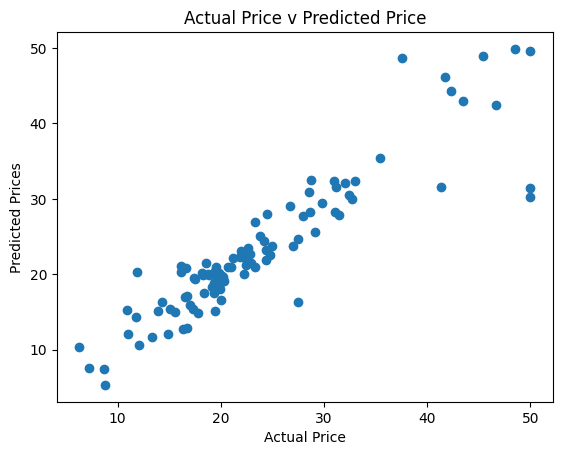

In [35]:
plt.scatter(Y_test,prediction_testing_data)
plt.xlabel ("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v Predicted Price")
plt.show()